# Bicol University Workshop: Exploratory Data Analysis (Part 3)
Prepared by: John Raymond B. Barajas

## Confidentiality Notice

This Jupyter Notebook and its contents are confidential and intended solely for the use of the intended recipient(s). If you have received this Notebook in error, please notify the sender immediately and delete it from your system. Any unauthorized use, disclosure, copying, or distribution of this Notebook is strictly prohibited.

The information contained in this Notebook may be privileged and confidential, and is intended only for the named recipient(s). Any review, dissemination, distribution, or copying of this Notebook by anyone other than the intended recipient(s) is strictly prohibited.

The content and opinions expressed in this Notebook are those of the author(s) and may not necessarily reflect the official policies or positions of the organization. Any views or opinions presented in this Notebook are solely those of the author(s) and do not necessarily represent those of the organization.

The security and integrity of the content of this Notebook cannot be guaranteed, and the author(s) shall not be held responsible for any unauthorized modification or alteration of the content.

Please treat this Notebook and its contents with the utmost confidentiality and refrain from sharing or distributing it without explicit permission from the author(s) or the organization.

Thank you for your cooperation and understanding.

## Install Necessary Libraries

In [ ]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn
# !pip install ipywidgets
# !pip install scikit-learn
# !pip install scipy
# !pip install "numpy<1.24"
# !pip install nltk
# !pip install bertopic

  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached hdbscan-0.8.30.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached plotly-5.15.0-py2.py3-none-any.whl (15.5 MB)
  Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
  Using cached tenacity-8.2.2-py3-none-any.whl (24 kB)
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
  Using cached torch-2.0.1-cp311-none-macosx_10_9_x86_64.whl (143.1 MB)
  Using cached torchvision-0.15.2-cp311-cp311-macosx_10_9_x86_64.whl (1.5 MB)
  Using cached sentencepiece-0.1.99-cp311-cp311-macosx_10_9_x86_64.whl (1.2 MB)
  Using cached huggingface_hub-0.16.4-py3-none-any.whl (268 kB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Using cached filelock-3.12.2-py3-none-any.whl (10 kB)
  Using cach

## Import Necessary Libraries

In [4]:
# import the necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from bertopic import BERTopic
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Code for Columns

To navigate easily on the `exit_survey_data.csv`, the following are the codes used for the columns:

| QUESTION                                                                                 | CODE            |
|:------------------------------------------------------------------------------------------|:-----------------|
| Questionnaires                                                                           | SURVEY_NAME     |
| Birthdate (Year, Month, Day)                                                             | BIRTHDATE       |
| Sex at birth as appearing in the Certificate of Live Birth                                | SEX             |
| Gender Preference:                                                                       | GENDER          |
| Are you a member of an indigenous or cultural group?                                      | Q1              |
| Permanent or home address                                                                | ADDRESS         |
| Family’s socioeconomic status, Estimated monthly family income:                           | FAMILY_INCOME   |
| Are you currently working either part-time or full-time?                                  | Q2              |
| School                                                                                   | SCHOOL          |
| Type of Institution                                                                      | SCHOOL_TYPE     |
| Course graduated from:                                                                   | COURSE          |
| Inclusive years of study                                                                 | STUDY_YEARS     |
| Did you shift courses? (If Yes, please specify your previous course)                      | Q3              |
| "Were you informed about the obligations that you may have after graduation because you availed Free Higher Education Program (FHE), Tertiary Education Subsidy (TES), or other scholarships?" | Q4 |
| "What are your plans after graduation or board exams? Please check all that applies."    | Q5              |
| On a scale of 1 to 10, rate your satisfaction on the delivery of the Universal Access to Quality Education (UAQTE)? (1 as the lowest and 10 is the highest) | Q6 |
| On a scale of 1 to 10, how beneficial was UAQTE to you?                                   | Q7              |
| In 3-4 sentences, write your experience as one of the beneficiaries of the UAQTE.         | Q8              |
| Do you feel that the delivery of FHE or TES can still be improved?                        | Q9              |
| Write a short description of the impact of UAQTE on you and your family.                  | Q10             |
| What issues and challenges did you encounter?                                             | Q11             |
| How did you cope with these issues and challenges?                                        | Q12             |
| What is your overall feedback of the implementation of the UAQTE?                         | Q13             |
| Which of the following did you avail in college? Select all that applies:                 | Q14             |

## Explore the Text Data

### Read Survey Data

In [5]:
# read survey data
file_path = 'exit_survey_clean_data.csv'
df = pd.read_csv(file_path)

### Check Metadata of Survey Data

In [6]:
# check the first 5 rows of the data
df.head(5)

,BIRTHDATE,SEX,GENDER,Q1,Q1_OTHER,ADDRESS,FAMILY_INCOME,Q2,SCHOOL,SCHOOL_TYPE,...,Q14_OTHER,Q5_International employment,Q5_Establish own business,Q5_Others,Q5_Obtain scholarship for graduate school,Q5_local employment (within),Q5_local employment (outside),Q14_Free Higher Education (FHE),Q14_Tertiary Education Subsidy (TES),AGE
0,2000.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),Bgy. 16 - Kawit-E...","Less than 50,000",Yes,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
1,1999.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),","Less than 50,000",No,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,24.0
2,2002.0,Female,Man,No,NaN,"Albay,City Of Tabaco,Bangkilingan","Within 50,000 - 100,000",No,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0
3,2000.0,Female,Man,No,NaN,"Albay,Legazpi City (Capital),Bgy. 34 - Oro Sit...","Within 50,000 - 100,000",Yes,Bicol University-Main,State Universities and Colleges (SUCs),...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0
4,1997.0,Male,Man,No,NaN,"La Union,City Of San Fernando (Capital)","Less than 25,000",Yes,Lorma Colleges,Private Higher Institutions,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0


In [7]:
# check info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   BIRTHDATE                                  345 non-null    float64
 1   SEX                                        345 non-null    object 
 2   GENDER                                     345 non-null    object 
 3   Q1                                         345 non-null    object 
 4   Q1_OTHER                                   4 non-null      object 
 5   ADDRESS                                    345 non-null    object 
 6   FAMILY_INCOME                              345 non-null    object 
 7   Q2                                         345 non-null    object 
 8   SCHOOL                                     345 non-null    object 
 9   SCHOOL_TYPE                                345 non-null    object 
 10  COURSE                    

### Perform Exploratory Data Analysis on Survey Data (Text)

#### Get Text Columns in Survey Data

In [8]:
# identify the column with text data manually
col_text = ['Q8']

#### Perform Sentiment Analysis on Chosen Text Column

In [9]:
# create sentiment analyzer object
sia = SentimentIntensityAnalyzer()

In [10]:
# create R_ID column
df['R_ID'] = df.index

In [11]:
# perform sentiment analysis on text data (non-empty cells only)
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = str(row[col_text])
    index = row['R_ID']
    res[index] = sia.polarity_scores(text)

  0%|          | 0/345 [00:00<?, ?it/s]

In [12]:
# merge results into the original cleaned dataframe
df_sent = pd.DataFrame(res).T
df_sent = df_sent.reset_index().rename(columns={'index': 'R_ID'})
df_sent = df_sent.merge(df, how='left')

In [13]:
# filter for R_IDs with no missing values in chosen text column
df_sent = df_sent[df_sent[col_text[0]].notna()]

In [14]:
# check first 5 rows of dataframe
df_sent

,R_ID,neg,neu,pos,compound,BIRTHDATE,SEX,GENDER,Q1,Q1_OTHER,...,Q14_OTHER,Q5_International employment,Q5_Establish own business,Q5_Others,Q5_Obtain scholarship for graduate school,Q5_local employment (within),Q5_local employment (outside),Q14_Free Higher Education (FHE),Q14_Tertiary Education Subsidy (TES),AGE
0,0,0.0,0.655,0.345,0.7003,2000.0,Female,Man,No,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
2,2,0.0,1.000,0.000,0.0000,2002.0,Female,Man,No,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0
4,4,0.0,0.599,0.401,0.7717,1997.0,Male,Man,No,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0
5,5,0.0,0.760,0.240,0.6249,2000.0,Male,Man,No,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0
6,6,0.0,0.838,0.162,0.4019,1999.0,Female,Woman,No,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,339,0.0,0.844,0.156,0.3412,2001.0,Female,Woman,No,NaN,...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0
340,340,0.0,0.615,0.385,0.7402,2000.0,Male,Man,No,NaN,...,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23.0
341,341,0.0,1.000,0.000,0.0000,2000.0,Male,Man,No,NaN,...,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0
342,342,0.0,0.833,0.167,0.4215,1996.0,Male,LGBTQIA+,No,NaN,...,NaN,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,27.0


#### Label Processed Survey Data with 0 or 1 based on Compound Score

In [15]:
# create new column sentiment (pos or neg or neu)
df_sent['SENTIMENT'] = np.where(df_sent['compound']>0, 'pos',
                                np.where(df_sent['compound']<0, 'neg', 'neu'))

In [16]:
# check first 5 rows of dataframe
df_sent

,R_ID,neg,neu,pos,compound,BIRTHDATE,SEX,GENDER,Q1,Q1_OTHER,...,Q5_International employment,Q5_Establish own business,Q5_Others,Q5_Obtain scholarship for graduate school,Q5_local employment (within),Q5_local employment (outside),Q14_Free Higher Education (FHE),Q14_Tertiary Education Subsidy (TES),AGE,SENTIMENT
0,0,0.0,0.655,0.345,0.7003,2000.0,Female,Man,No,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,pos
2,2,0.0,1.000,0.000,0.0000,2002.0,Female,Man,No,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.0,neu
4,4,0.0,0.599,0.401,0.7717,1997.0,Male,Man,No,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,pos
5,5,0.0,0.760,0.240,0.6249,2000.0,Male,Man,No,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,pos
6,6,0.0,0.838,0.162,0.4019,1999.0,Female,Woman,No,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,339,0.0,0.844,0.156,0.3412,2001.0,Female,Woman,No,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,pos
340,340,0.0,0.615,0.385,0.7402,2000.0,Male,Man,No,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,23.0,pos
341,341,0.0,1.000,0.000,0.0000,2000.0,Male,Man,No,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,neu
342,342,0.0,0.833,0.167,0.4215,1996.0,Male,LGBTQIA+,No,NaN,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,27.0,pos


#### Perform Some Exploratory Data Analysis Based on Sentiment Scores

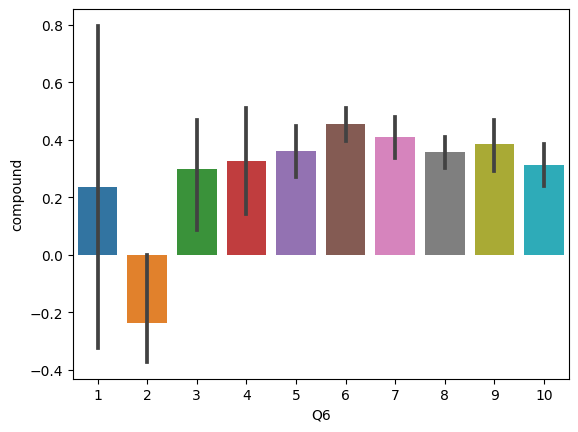

In [17]:
# compare sentiments for Q6 Likert Scale Values
ax = sns.barplot(data=df_sent, x='Q6', y='compound')

In [18]:
# identify column of interest
col_EDA = 'Q6'

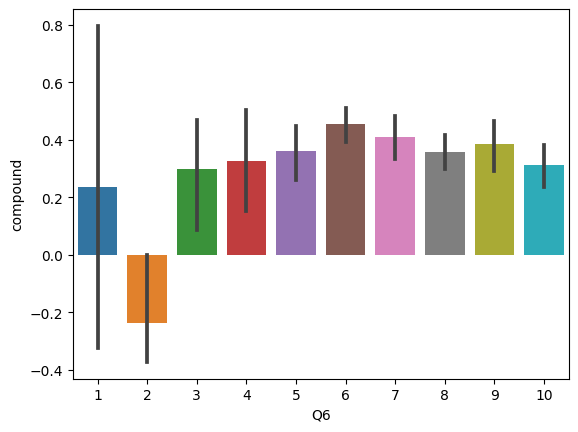

In [19]:
# compare sentiments for Q6 Likert Scale Values
ax = sns.barplot(data=df_sent, x=col_EDA, y='compound')

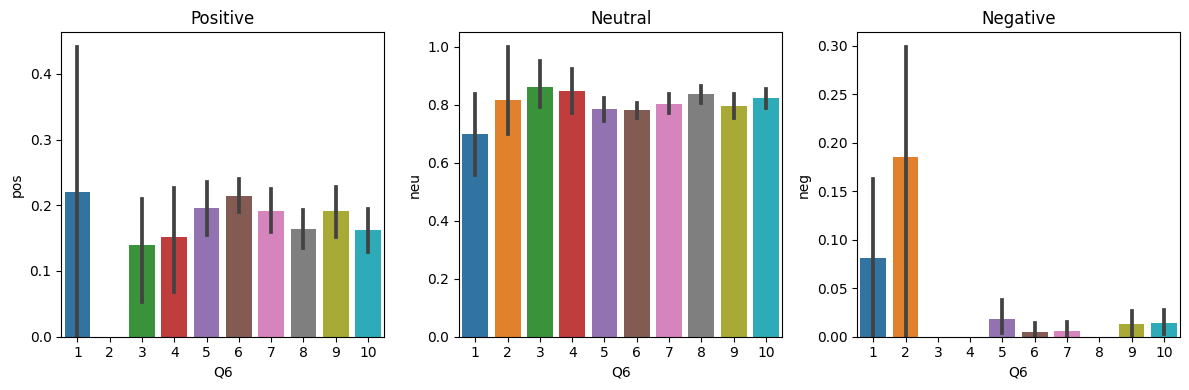

In [20]:
# compare all sentiments for Q6 Likert Scale Values
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=df_sent, x=col_EDA, y='pos', ax=axs[0])
sns.barplot(data=df_sent, x=col_EDA, y='neu', ax=axs[1])
sns.barplot(data=df_sent, x=col_EDA, y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Perform Topic Modelling on Chosen Text Column

In [21]:
# select text column
col_text = 'Q8'

In [22]:
# remove stop words
stop = stopwords.words('english')
df_sent[col_text] = df_sent[col_text].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [23]:
# instatiate BERT model
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [24]:
# fit data to BERT model
topics, probs = topic_model.fit_transform(df_sent[col_text].to_list())

In [25]:
# get topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9,-1_nga_ti_iti_ta,"[nga, ti, iti, ta, kuma, sapay, tulong, dakkel...",[It helpful us. Nang-nangruna kadagiti makasap...
1,0,302,0_education_it_uaqte_tuition,"[education, it, uaqte, tuition, free, financia...",[I grateful one beneficiaries UAQTE. Since I a...
2,1,18,1_good_satisfy_nothing_none,"[good, satisfy, nothing, none, hepful, goods, ...","[good, Good, good.]"


In [26]:
# visualize topics
topic_model.visualize_barchart()

In [27]:
# can't visualize due to 2 dimensions only
# topic_model.visualize_topics()

In [28]:
# can't get hierarchy due to low volume of data
# hierarchical_topics = topic_model.hierarchical_topics(df_sent[col_text].to_list(), topics)

In [29]:
# can't visualize due to low volume of data
# topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)